In [1]:

import numpy as np
import  matplotlib.pyplot as plt

In [2]:
f = lambda x : np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

1. Полиномиальная регрессия (5 баллов) 
Воспользуемся описанным свойством и будем находить приближение функции 
многочленом, решая систему линейных уравнений (1). Сформируйте систему линейных 
уравнений (то есть задайте матрицу коэффициентов A и вектор правых частей b ) для 
многочлена, который должен совпадать с функцией f в n точках, эквидистантно 
расположенных на отрезке x [1,15] (для этого удобно использовать функцию 
np.linspace()). Решите данную систему с помощью функции np.linalg.solve(). 
Постройте графики 1) исходной функции, 2) точек, по которым строился многочлен, 3) 
полиномиальную аппроксимацию. 
Хорошо ли полином приближает исходную функцию? 
Рассмотрите несколько различных значений n . Как меняется приближение с ростом числа 
точек (и соответственно степени полинома)? Хорошо ли ведёт себя полином при n  5? А 
при n 15? 


In [93]:
def polynomialRegression_method_gauss(n, f,x):
    n2 = len(x)
    X = np.linspace(0, 15,n)
    A = np.zeros((n,n))
    B = np.zeros((n2,n))
    for i in range(n):
        A[:,i] = X**i
        B[:,i] = x**i
    coef = np.linalg.solve(A,f(X))
    Y = np.zeros(n2)
    for i in range(n2):
        Y[i] = np.matmul(B[i,:],np.transpose(coef))
    return  Y
    
    


In [94]:
x = np.linspace(0,15 , 10)
x2 = np.linspace(0,15 , 20)

In [95]:
y=polynomialRegression_method_gauss(5,f,x)

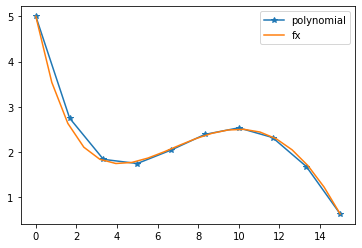

In [96]:
#n = 5
plt.plot(x,y, '*-')
plt.plot(x2, f(x2))
plt.legend(['polynomial','fx'])

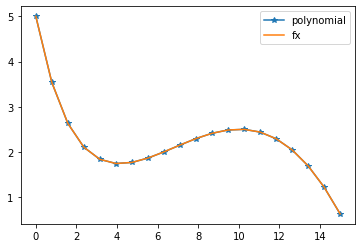

In [97]:
#n= 15
x = np.linspace(0,15 , 20)
y=polynomialRegression_method_gauss(15,f,x)
plt.plot(x,y, '*-' )
plt.plot(x, f(x))
plt.legend(['polynomial','fx'])

2. Полиномиальная регрессия с зашумлённым данными (5 баллов) 
Рассмотрим случай, когда значение функции f известно с некоторой неточностью. Для 
этого добавьте к значениям функции ( )i
f x случайный шум. Шум сгенерируйте из 
гауссового распределения с нулевым средним и стандартным отклонением   0.01.
Повторите те же шаги, что и в пункте 1 для многочленов различной степени. Как 
изменилась полиномиальная аппроксимация в этом случае? Хорошо ли ведёт себя 
полином при n  5? А при n 15? 


In [126]:

def polynomialRegression_method_gauss_with_noise(n, f,x):
    noise = 0.1
    n2 = len(x)
    X = np.linspace(0, 15,n)
    A = np.zeros((n,n))
    B = np.zeros((n2,n))
    for i in range(n):
        A[:,i] = X**i
        B[:,i] = x**i
    y = f(X) + np.random.randn(n) * noise
    coef = np.linalg.solve(A,y)
    Y = np.zeros(n2)
    for i in range(n2):
        Y[i] = np.matmul(B[i,:],np.transpose(coef))
    return  Y

In [127]:
x = np.linspace(0,15 , 100)
x2 = np.linspace(0,15 , 20)

In [128]:
y=polynomialRegression_method_gauss_with_noise(5,f,x)

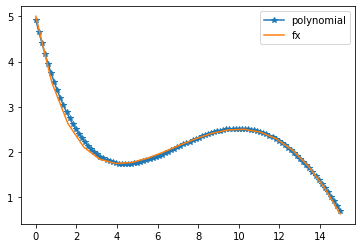

In [129]:
#n = 5
plt.plot(x,y, '*-')
plt.plot(x2, f(x2))
plt.legend(['polynomial','fx'])

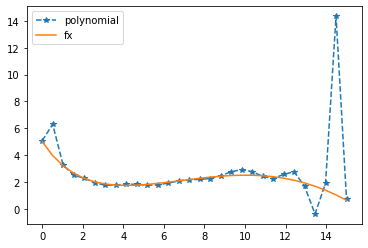

In [131]:
#n= 15
x = np.linspace(0,15 , 30)
y=polynomialRegression_method_gauss_with_noise(15,f,x)
plt.plot(x,y, '*--' )
plt.plot(x, f(x))
plt.legend(['polynomial','fx'])

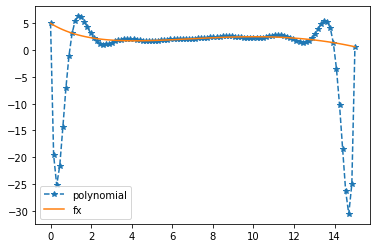

In [132]:
#n= 15
x = np.linspace(0,15 , 100)
y=polynomialRegression_method_gauss_with_noise(15,f,x)
plt.plot(x,y, '*--' )
plt.plot(x, f(x))
plt.legend(['polynomial','fx'])

3. Метод наименьших квадратов (5 баллов) 
Третья часть задания посвящена собственно методу наименьших квадратов. 
Выше мы строили полиномиальную регрессию той степени, которая соответствовала 
числу точек. Т.е. при количестве точек равных n мы получали полином степени n 1. На 
практике обычно ограничиваются полиномами степени не выше третьей, независимо от 
количества имеющихся точек. 
Рассмотрим теперь случай, когда точек много. Пусть количество точек равно N , а 
полином по-прежнему имеет вид 2 3 1
0 1 2 3 1 ...
n w w x w x w x w x n
      
, причём N n  . Тогда 
в системе линейных уравнений вида (1) количество уравнений будет больше, чем число 
неизвестных. Подобного рода система уравнений может не иметь точного решения, 
особенно в случае, когда правая часть является приближённой, т.е. с шумом. 
В таких случаях, вместо точного решения системы уравнений обычно решают задачу 
минимизации невязки уравнений: 
min
x
Ax b  (2) 
где в качестве нормы  обычно используют квадратичную норму. Поэтому такой подход 
называют методом наименьших квадратов. 
Для решения данной задачи (2) используйте готовую функцию np.linalg.lstsq(), которая 
аналогично функции np.linalg.solve() принимает два аргумента: матрицу коэффициентов 
A и вектор правых частей b . Данная функция возвращает несколько объектов, первый из 
которых есть решение задачи. 
Возьмите N 100 точек на отрезке x [1,15] и посчитайте в них значение функции f , 
добавьте гауссов с большим шумом с   0.1. Постройте методом наименьших квадратов 
кубический полином по данным точкам. 
Постройте графики 1) исходной функции, 2) точек, по которым строился многочлен, 3) 
полиномиальную аппроксимацию. 
Сделайте выводы по всей работе. 


In [205]:
def polynomialRegression_method_least_sqaures(n, f,x):
    n2 = len(x)
    X = np.linspace(0, 15,20)
    A = np.zeros((len(X),n))
    B = np.zeros((n2,n))
    for i in range(n):
        A[:,i] = X**i
        B[:,i] = x**i
    coef = np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)), np.matmul(np.transpose(A),f(X))) # (A*A)^-1*A^-1*y
    Y = np.zeros(n2)
    for i in range(n2):
        Y[i] = np.matmul(B[i,:],np.transpose(coef))
    return  Y

In [206]:
x = np.linspace(0,15 , 50)
x2 = np.linspace(0,15 , 20)


In [207]:
y=polynomialRegression_method_least_sqaures(5,f,x)

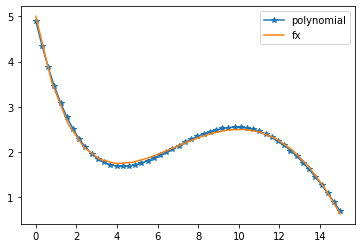

In [208]:
#n = 5 но A = 20*5 dimension
plt.plot(x,y, '*-')
plt.plot(x2, f(x2))
plt.legend(['polynomial','fx'])

In [239]:
def polynomialRegression_method_least_sqaures_with_noise(n, f,x):
    noise = 0.1
    n2 = len(x)
    X = np.linspace(0, 15,100)
    A = np.zeros((len(X),n))
    B = np.zeros((n2,n))
    for i in range(n):
        A[:,i] = X**i
        B[:,i] = x**i
    y = f(X) + np.random.randn(len(X)) * noise
    coef = np.linalg.lstsq(A,y, rcond=None)[0] # (A*A)^-1*A^-1*y
    print(coef)
    Y = np.zeros(n2)
    for i in range(n2):
        Y[i] = np.matmul(B[i,:],np.transpose(coef))
    return  Y

[ 4.37807652e+00  1.62349446e-01 -9.95945108e-01 -5.38629184e-01
  8.26107742e-01 -3.58366263e-01  8.19390024e-02 -1.12295278e-02
  9.54302683e-04 -4.93358614e-05  1.42291430e-06 -1.75703360e-08]


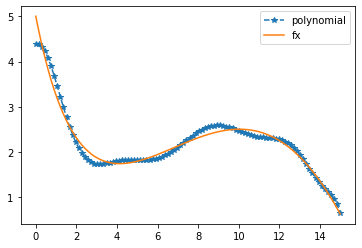

In [242]:
#n= 15 но A = 20*5 dimension
x = np.linspace(0,15 , 100)
y=polynomialRegression_method_least_sqaures_with_noise(12,f,x)
plt.plot(x,y, '*--' )
plt.plot(x, f(x))
plt.legend(['polynomial','fx'])